In [12]:
import numpy as np
import pandas as pd
from sklearn import datasets

import matplotlib.pyplot as plt
% matplotlib inline

%pylab inline
pylab.rcParams['figure.figsize'] = (18, 10)

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [3]:
boston = datasets.load_boston()

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
boston.data.shape

(506, 13)

In [6]:
boston.target.shape

(506,)

In [7]:
columns_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']

In [8]:
df = pd.DataFrame(boston.data,columns=columns_names[:-1])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


## Standardize might help

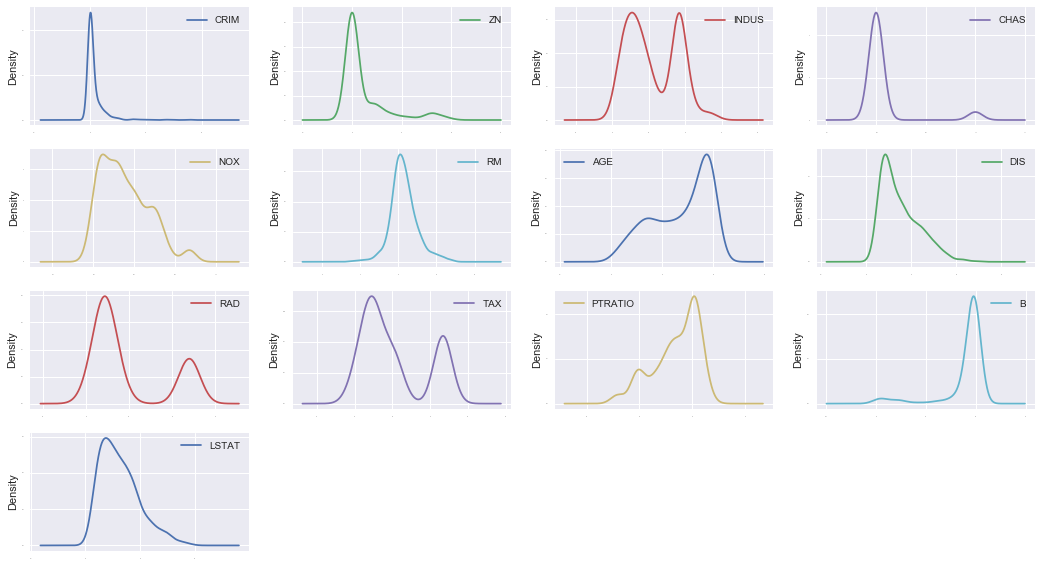

In [13]:
df.plot(kind='density',subplots=True,layout = (4,4),sharex=False,fontsize=1)
plt.show()

## Lots of collinearity
Handling Multicollinearity in Regression Analysis
http://blog.minitab.com/blog/understanding-statistics/handling-multicollinearity-in-regression-analysis

One way to measure multicollinearity is the variance inflation factor (VIF), which assesses how much the variance of an estimated regression coefficient increases if your predictors are correlated.  If no factors are correlated, the VIFs will all be 1.

A VIF between 5 and 10 indicates high correlation that may be problematic. And if the VIF goes above 10, you can assume that the regression coefficients are poorly estimated due to multicollinearity.

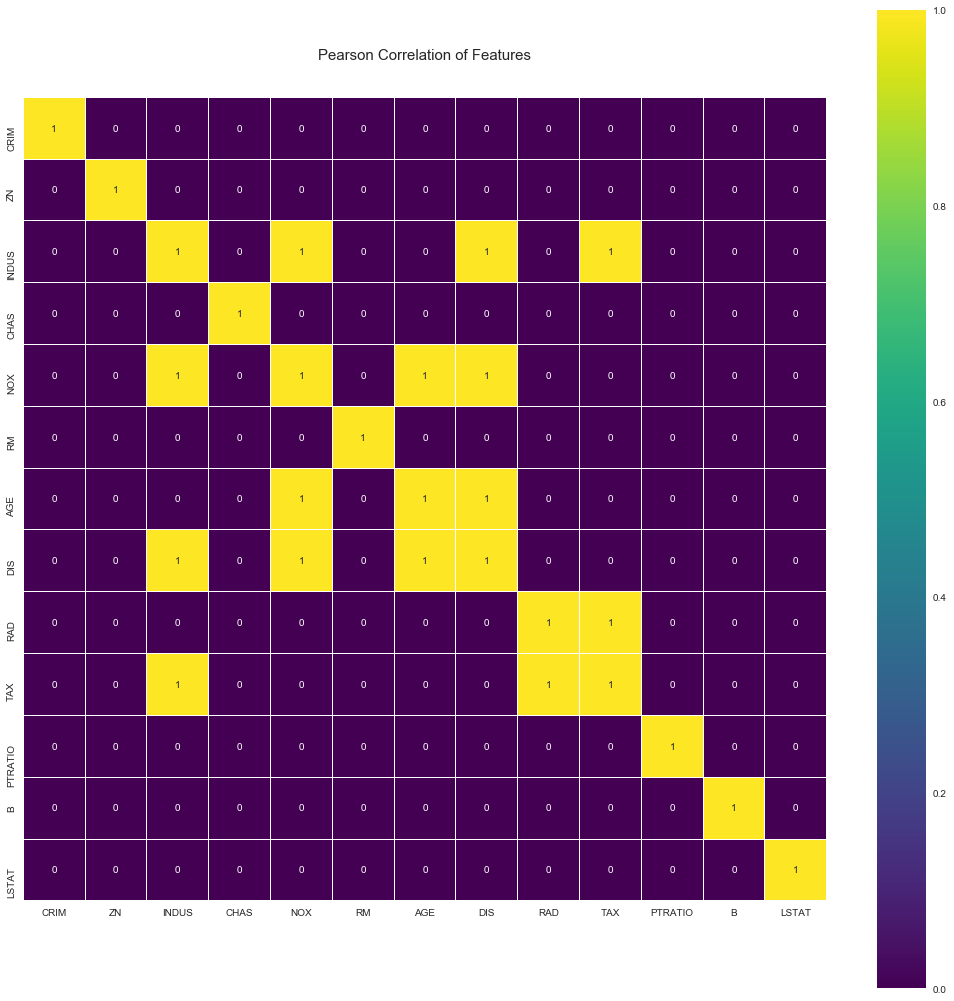

In [14]:
colormap = plt.cm.viridis
plt.figure(figsize=(18,18))
plt.title('Pearson Correlation of Features', y=1.04, size=15)
sns.heatmap(((df.corr()<-0.7 )| (df.corr()> 0.7)),linewidths=0.02,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [15]:
num_folds = 10
seed = 10
scoring = 'neg_mean_squared_error'
validation_size=0.2

In [16]:
X_train, X_validation, Y_train, Y_validation = train_test_split(boston.data, boston.target, test_size=validation_size, random_state=seed)

In [17]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('SVR', SVR()))
models.append(('AB', AdaBoostRegressor(random_state=seed)))
models.append(('GB', GradientBoostingRegressor(random_state=seed)))
models.append(('BAG', BaggingRegressor(random_state=seed)))
models.append(('RF', RandomForestRegressor(random_state=seed)))
models.append(('ET', ExtraTreesRegressor(random_state=seed)))
results = []
names = []
mean_scores=[]
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -21.257541 (7.112475)
LASSO: -25.653991 (9.789850)
EN: -24.375379 (9.383574)
KNN: -36.762851 (7.377223)
CART: -23.852891 (10.688491)
SVR: -76.459311 (17.219328)
AB: -14.695454 (10.713536)
GB: -9.853869 (5.621769)
BAG: -13.756779 (7.903624)
RF: -12.804298 (7.233866)
ET: -9.796606 (5.965343)


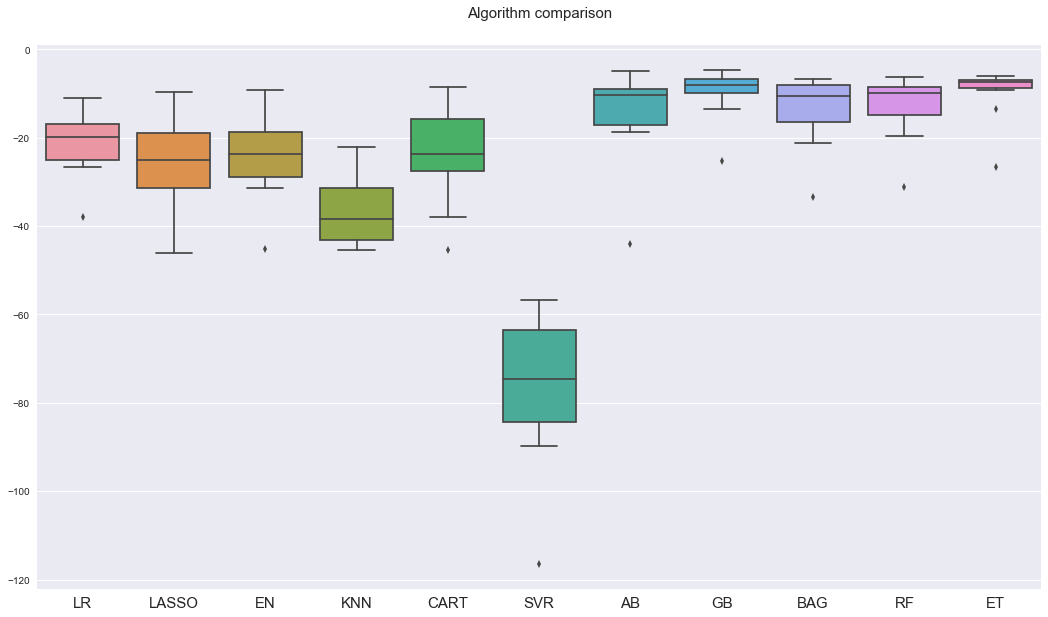

In [18]:
ax = sns.boxplot(data=results)
ax.set_title('Algorithm comparison',y=1.04,size=15)
ax.set_xticklabels(names,size=15)
plt.show()

## Standardize X, KNN and SVR performance are improved a lot, still can't compete with GB and ET.

In [19]:
pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO',Pipeline([('Scaler',StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN',Pipeline([('Scaler',StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART', DecisionTreeRegressor(random_state=seed))])))
pipelines.append(('ScaledSVR',Pipeline([('Scaler',StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledAB',Pipeline([('Scaler',StandardScaler()),('AB', AdaBoostRegressor(random_state=seed))])))
pipelines.append(('ScaledGB',Pipeline([('Scaler',StandardScaler()),('GB', GradientBoostingRegressor(random_state=seed))])))
pipelines.append(('ScaledBAG',Pipeline([('Scaler',StandardScaler()),('BAG', BaggingRegressor(random_state=seed))])))
pipelines.append(('ScaledRF',Pipeline([('Scaler',StandardScaler()),('RF', RandomForestRegressor(random_state=seed))])))
pipelines.append(('ScaledET',Pipeline([('Scaler',StandardScaler()),('ET', ExtraTreesRegressor(random_state=seed))])))

results = []
names = []
mean_scores =[]
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -21.257541 (7.112475)
ScaledLASSO: -26.933832 (10.377392)
ScaledEN: -28.607710 (11.646031)
ScaledKNN: -20.395992 (11.865126)
ScaledCART: -23.830891 (10.705289)
ScaledSVR: -28.548997 (13.949957)
ScaledAB: -14.403982 (9.962217)
ScaledGB: -9.854425 (5.621253)
ScaledBAG: -13.746742 (7.911773)
ScaledRF: -12.792863 (7.244274)
ScaledET: -9.796606 (5.965343)


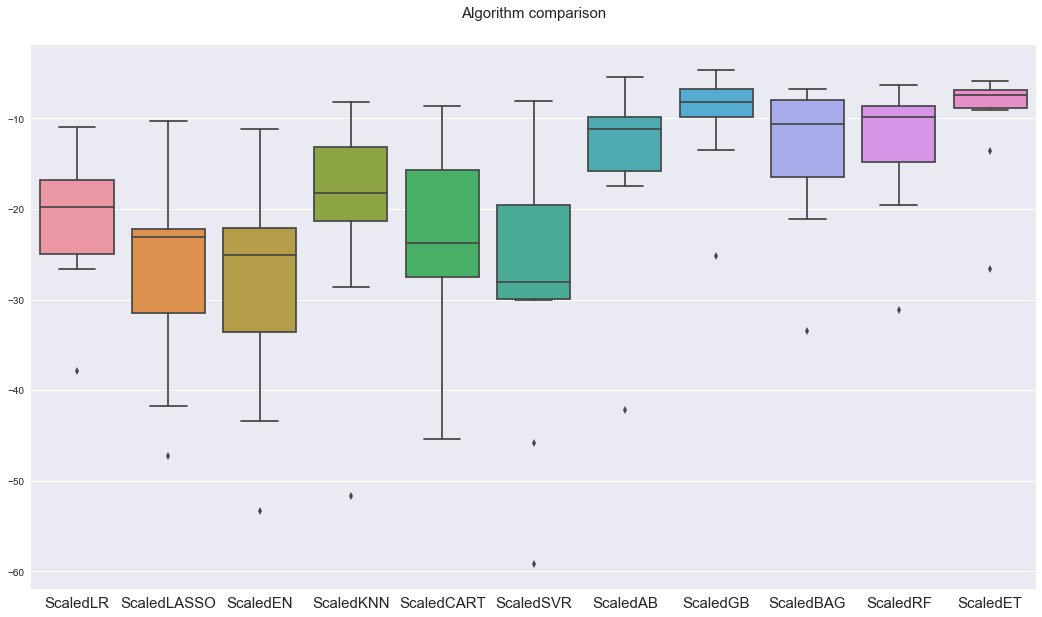

In [20]:
ax = sns.boxplot(data=results)
ax.set_title('Algorithm comparison',y=1.04,size=15)
ax.set_xticklabels(names,size=15)
plt.show()

## Narrow down to GB and ET, let's tune the parameters

In [21]:
model = GradientBoostingRegressor(random_state=seed)
model.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=10, subsample=1.0, verbose=0,
             warm_start=False)

In [22]:
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
parameters = {'n_estimators':list(range(80,250,10)),
              'max_features': ['sqrt', 'auto', 'log2'],
              'max_depth':[3,5,10],
              'n_estimators':[100,120,200,400,500],
              'min_samples_leaf': [2,6,10]}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -8.633038 using {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 400}


In [23]:
model = ExtraTreesRegressor(random_state=seed)
model.fit(X_train,Y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=10,
          verbose=0, warm_start=False)

In [24]:
model = ExtraTreesRegressor(random_state=seed)
model.fit(X_train,Y_train)
kfold = KFold(n_splits=num_folds, random_state=seed)
parameters = {'n_estimators':list(range(80,250,10)),
              'max_features': ['sqrt', 'auto', 'log2'],
              'max_depth':[3,5,10],
              'n_estimators':[10,30,50,100,120,200],
              'min_samples_leaf': [2,6,10]}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -9.967824 using {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 50}


In [25]:
model = GradientBoostingRegressor(max_depth=5, max_features='sqrt', min_samples_leaf= 2, n_estimators=400,random_state=seed)
model.fit(X_train,Y_train)
pred=model.predict(X_validation)
mean_squared_error(Y_validation,pred)

14.991839896124395